#

In [183]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import patsy as pt
from sklearn import datasets # pip install -U scikit-learn
import statsmodels.api as sm
import statsmodels.formula.api as smf

The start of this notebook is largely borrowed from: [scikit learn’s
page on ‘Recognizing hand-written
digits’](https://scikit-learn.org/stable/auto_examples/classification/plot_digits_classification.html)

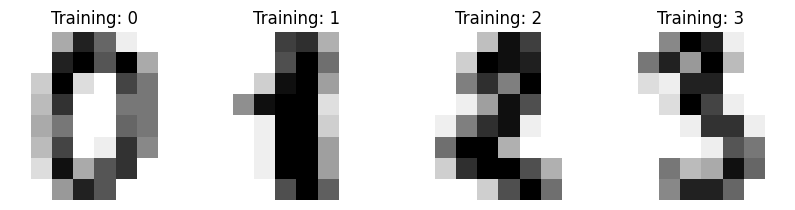

In [2]:
digits = datasets.load_digits()

_, axes = plt.subplots(nrows=1, ncols=4, figsize=(10, 3))
for ax, image, label in zip(axes, digits.images, digits.target):
    ax.set_axis_off()
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation="nearest")
    ax.set_title("Training: %i" % label)

In [6]:
digits.images[1]

array([[ 0.,  0.,  0., 12., 13.,  5.,  0.,  0.],
       [ 0.,  0.,  0., 11., 16.,  9.,  0.,  0.],
       [ 0.,  0.,  3., 15., 16.,  6.,  0.,  0.],
       [ 0.,  7., 15., 16., 16.,  2.,  0.,  0.],
       [ 0.,  0.,  1., 16., 16.,  3.,  0.,  0.],
       [ 0.,  0.,  1., 16., 16.,  6.,  0.,  0.],
       [ 0.,  0.,  1., 16., 16.,  6.,  0.,  0.],
       [ 0.,  0.,  0., 11., 16., 10.,  0.,  0.]])

In [21]:
n_samples = len(digits.images)
data = digits.images.reshape((n_samples, -1))
nrows, ncols = np.shape(data)
(nrows, ncols)

(1797, 64)

In [96]:
cols = np.array(["x" + str(m).zfill(2) for m in range(ncols)])
rng = np.random.default_rng()
train = rng.choice(nrows, size = int(np.floor(0.7 * nrows)), replace = False)
test = np.setdiff1d(np.arange(nrows), train)
np.any(np.isin(train, test)), np.size(train) + np.size(test)

(False, 1797)

In [136]:
dftrain = pd.DataFrame(data[train], columns = cols)

In [137]:
dftrain["y"] = (digits.target[train] == 7).astype(np.float64)

In [138]:
formula = "y ~ " + " + ".join(dftrain.columns[:-1])

In [139]:
model = smf.glm(formula, data = dftrain, family = sm.families.Binomial())
fit = model.fit_regularized(alpha = 0.001, L1_wt = 0)

In [141]:
digits.target[train][fit.predict(dftrain) > 0.5] 

array([7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7,
       7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7,
       7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7,
       7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7,
       7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7,
       7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7])

In [142]:
np.any(digits.target[train][fit.predict(dftrain) < 0.5] == 7)

False

In [153]:
dftest = pd.DataFrame(data[test], columns = cols)
np.where(digits.target[test][fit.predict(dftest) > 0.5] != 7)

(array([ 8,  9, 26, 29]),)

In [148]:
np.where(digits.target[test][fit.predict(dftest) < 0.5] == 7)

(array([307]),)

In [149]:
digits.target[test][307]

9

5

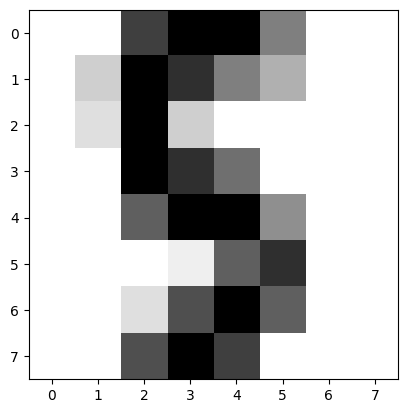

In [158]:
not7 = 29
plt.imshow(digits.images[test][not7], cmap=plt.cm.gray_r, interpolation="nearest")
digits.target[test][not7]

If you want to predict all digits simultaneously, I’d switch to the more
sophisticated tools in Scikit-learn: [scikit learn’s logistic
regression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html)

Nonetheless, much of what we did here sets you up very well for using
scikit-learn’s logistic regression’s functions. For instance, the fit
method on the `LogisticRegression` class takes two numpy arrays `X` and
`y`. These can be computed as follows.

In [185]:
y, X = pt.dmatrices(formula, data = dftrain)